### 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt 
from sklearn import linear_model
import math
import seaborn as sns 
%matplotlib inline

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score

### 2. Import the data from the csv file 

In [2]:
data = pd.read_excel('C:/Users/HP/Ironhack/Week_5/Mid_bootcamp_project/MidProject/Data/raw/house_prices/regression_data.xls', )

### 3. Display entire Data

In [3]:
display(data) #Data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


### 4. Drop the column `date` from the database

In [4]:
data.drop('date', axis=1)
data.head(10)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
5,7237550310,2014-05-12,4,4.50,5420,101930,1.0,0,0,3,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000
6,1321400060,2014-06-27,3,2.25,1715,6819,2.0,0,0,3,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,257500
7,2008000270,2015-01-15,3,1.50,1060,9711,1.0,0,0,3,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,291850
8,2414600126,2015-04-15,3,1.00,1780,7470,1.0,0,0,3,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,229500
9,3793500160,2015-03-12,3,2.50,1890,6560,2.0,0,0,3,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,323000


### 5. find how many rows of data you have.

In [5]:
data.shape

(21597, 21)

### 6.   Now we will try to find the unique values in some of the categorical columns:

##### - What are the unique values in the column `bedrooms`?

In [6]:
data.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

##### - What are the unique values in the column `bathrooms`?

In [7]:
data.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

##### - What are the unique values in the column `floors`?

In [8]:
data.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

##### - What are the unique values in the column `condition`?

In [9]:
data.condition.unique()

array([3, 5, 4, 1, 2], dtype=int64)

##### - What are the unique values in the column `grade`?

In [10]:
data.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

### 7. Arrange the data in a decreasing order by the price of the house. Return only the IDs of the top 10 most     expensive houses in your data.

In [11]:
a = data.price.sort_values()
a

15279      78000
465        80000
16184      81000
8267       82000
2139       82500
          ...   
1446     5350000
4407     5570000
9245     6890000
3910     7060000
7245     7700000
Name: price, Length: 21597, dtype: int64

In [12]:
a1 = a.tail(10)
most_expensive_10 = a1
print("Most Expensive 10 properties are: \n", most_expensive_10)

Most Expensive 10 properties are: 
 8629    4490000
2624    4500000
8085    4670000
1162    5110000
1313    5300000
1446    5350000
4407    5570000
9245    6890000
3910    7060000
7245    7700000
Name: price, dtype: int64


### 8. What is the average price of all the properties in your data?

In [13]:
data.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [14]:
avg_prop = data["price"].mean()
print("The average price of all the properties in data is: ", avg_prop)

The average price of all the properties in data is:  540296.5735055795


### 9. Simple group by to check the properties of some of the categorical variables in our data

##### - What is the average price of the houses grouped by bedrooms? The returned result should have only two columns, bedrooms and Average of the prices. Use an alias to change the name of the second column.

In [15]:
gp_bed_price = data.groupby(['bedrooms'])['price'].mean()
print("The average price of the houses grouped by bedrooms are : -----  \n\n", gp_bed_price)

The average price of the houses grouped by bedrooms are : -----  

 bedrooms
1     3.182395e+05
2     4.013877e+05
3     4.662766e+05
4     6.355647e+05
5     7.868741e+05
6     8.258535e+05
7     9.514478e+05
8     1.105077e+06
9     8.939998e+05
10    8.200000e+05
11    5.200000e+05
33    6.400000e+05
Name: price, dtype: float64


##### - What is the average 'sqft_living' of the houses grouped by bedrooms? The returned result should have only two columns, bedrooms and Average of the 'sqft_living'. Use an alias to change the name of the second column.

In [16]:
gp_bed_sqft_living = data.groupby(['bedrooms'])['sqft_living'].mean()
print("The average 'sqft_living' of the houses grouped by bedrooms are : ----- \n ", gp_bed_sqft_living)

The average 'sqft_living' of the houses grouped by bedrooms are : ----- 
  bedrooms
1      888.153061
2     1239.752899
3     1805.837235
4     2554.649666
5     3047.545284
6     3284.341912
7     3974.210526
8     3800.000000
9     3775.000000
10    3706.666667
11    3000.000000
33    1620.000000
Name: sqft_living, dtype: float64


##### - What is the average price of the houses with a waterfront and without a waterfront? The returned result should have only two columns, waterfront and `Average` of the prices. Use an alias to change the name of the second column.

In [17]:
data.waterfront.unique()

array([0, 1], dtype=int64)

In [95]:
avg_price_waterfront =data.groupby(['waterfront'])['price'].mean()
avg_price_waterfront
print("The average price of the houses with a waterfront and without a waterfront : ----- \n ", avg_price_waterfront)

The average price of the houses with a waterfront and without a waterfront : ----- 
  waterfront
False    5.317623e+05
True     1.662524e+06
Name: price, dtype: float64


Text(0.5, 1.0, 'waterfront vs price')

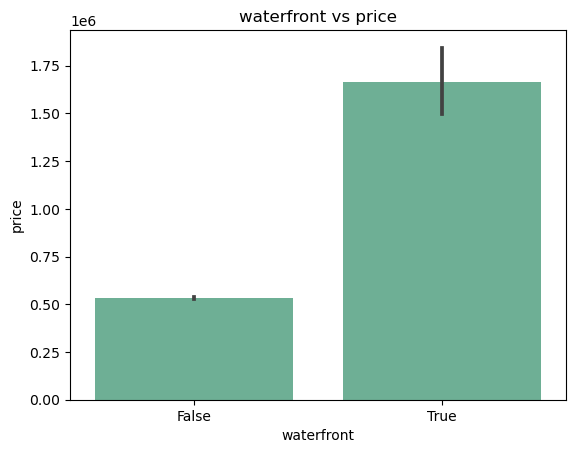

In [99]:
sns.barplot(x='waterfront',y='price', color="#63ba97", data=data)
plt.title('waterfront vs price')

properties with waterfront

In [93]:
(data['waterfront']==0) & (data['price'] > 100000)


7245      True
3910     False
9245      True
4407      True
1446      True
         ...  
2139     False
8267     False
16184    False
465      False
15279    False
Length: 21597, dtype: bool

##### - Is there any correlation between the columns `condition` and `grade`? You can analyse this by grouping the data by one of the variables and then aggregating the results of the other column. Visually check if there is a positive correlation or negative correlation or no correlation between the variables.

In [19]:
avg_cond_grade = data.groupby(['condition'])['grade'].mean()
avg_cond_grade

condition
1    5.965517
2    6.541176
3    7.827318
4    7.382596
5    7.320988
Name: grade, dtype: float64

Text(0.5, 1.0, 'condition vs grade')

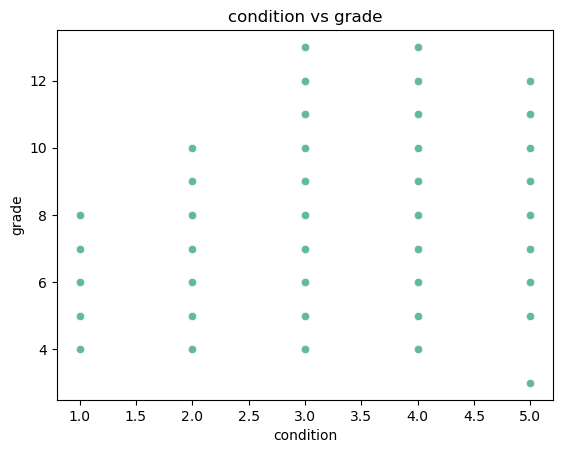

In [20]:
sns.scatterplot(x='condition',y='grade', color="#63ba97", data=data)
plt.title('condition vs grade')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

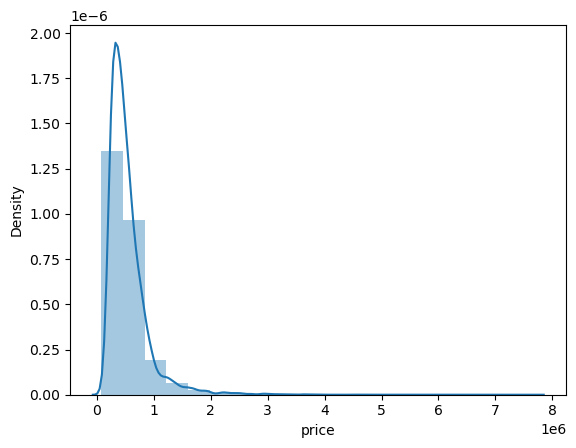

In [21]:
sns.distplot(data['price'], bins=20)

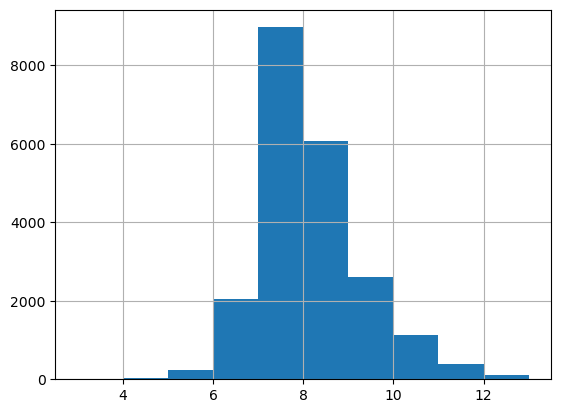

In [22]:
data['grade'].hist()
plt.show()

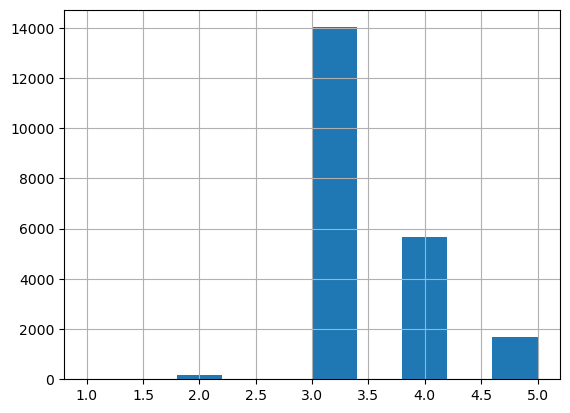

In [23]:
data['condition'].hist()
plt.show()

###### There is positive correlation between condition and grade, grade is higher if condition is good 

##### - You might also have to check the number of houses in each category (ie number of houses for a given `condition`) to assess if that category is well represented in the dataset to include it in your analysis. For eg. If the category is under-represented as compared to other categories, ignore that category in this analysis

In [24]:
count_cond_id = data.groupby(['condition'])['id'].count()
count_cond_id

condition
1       29
2      170
3    14020
4     5677
5     1701
Name: id, dtype: int64

### 10.  One of the customers is only interested in the following houses:

    - Number of bedrooms either 3 or 4
    - Bathrooms more than 3
    - One Floor
    - No waterfront
    - Condition should be 3 at least
    - Grade should be 5 at least
    - Price less than 300000

In [25]:
data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [26]:
new_customer = data[(data.bedrooms).isin([3 , 4]) & (data.bathrooms >3) & (data.floors == 1) & (data.waterfront ==0) & (data.condition >= 3) & (data.grade >= 5) & (data.price < 300000)]
new_customer

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


### For given condition currently there is no property available 

### 11. Your manager wants to find out the list of properties whose prices are twice more than the average of all the properties in the database. Write a query to show them the list of such properties. You might need to use a sub query for this problem.

In [27]:
data.price.mean()

540296.5735055795

In [28]:
double_mean = data.price.mean() * 2

In [29]:
double_avg_property = data[(data.price) > data.price.mean() * 2]
double_avg_property


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
5,7237550310,2014-05-12,4,4.50,5420,101930,1.0,0,0,3,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000
21,2524049179,2014-08-26,3,2.75,3050,44867,1.0,0,4,3,...,2330,720,1968,0,98040,47.5316,-122.233,4110,20336,2000000
49,822039084,2015-03-11,3,2.50,2753,65005,1.0,1,2,5,...,2165,588,1953,0,98070,47.4041,-122.451,2680,72513,1350000
69,1802000060,2014-06-12,5,2.25,3200,20158,1.0,0,0,3,...,1600,1600,1965,0,98004,47.6303,-122.215,3390,20158,1330000
91,5036300431,2015-03-11,5,2.75,3520,6353,2.0,0,0,4,...,3520,0,2001,0,98199,47.6506,-122.391,2520,6250,1100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21560,9253900271,2015-01-07,5,4.50,4850,10584,2.0,1,4,3,...,3540,1310,2007,0,98008,47.5943,-122.110,3470,18270,3570000
21574,7430200100,2014-05-14,4,3.50,4910,9444,1.5,0,0,3,...,3110,1800,2007,0,98074,47.6502,-122.066,4560,11063,1220000
21577,8672200110,2015-03-17,5,3.75,4170,8142,2.0,0,2,3,...,4170,0,2006,0,98056,47.5354,-122.181,3030,7980,1090000
21581,191100405,2015-04-21,4,3.25,3410,10125,2.0,0,0,3,...,3410,0,2007,0,98040,47.5653,-122.223,2290,10125,1580000


### 12. Since this is something that the senior management is regularly interested in, create a view called "Houses_with_higher_than_double_average_price" of the same query.

### 13. Most customers are interested in properties with three or four bedrooms. What is the difference in average prices of the properties with three and four bedrooms? In this case you can simply use a group by to check the prices for those particular houses

In [46]:
bed_34_mean_price = data[data['bedrooms'].isin([3,4])].groupby(['bedrooms']).agg({'price':np.mean}).reset_index().round(2)
display(bed_34_mean_price)
print("the difference in average prices of the properties with three and four bedrooms is : ", round(bed_34_mean_price.loc[1,'price'] - bed_34_mean_price.loc[0,'price'],2))

,bedrooms,price
0,3,466276.59
1,4,635564.68


the difference in average prices of the properties with three and four bedrooms is :  169288.09


### 14. What are the different locations where properties are available in your database? 

In [47]:
data.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

### 15. Show the list of all the properties that were renovated.

In [48]:
property_renovated = data.loc[data['yr_renovated'] > 0]
property_renovated

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
35,9547205180,2014-06-13,3,2.50,2300,3060,1.5,0,0,3,...,1510,790,1930,2002,98115,47.6827,-122.310,1590,3264,696000
95,1483300570,2014-09-08,4,2.50,3300,10250,1.0,0,0,3,...,2390,910,1946,1991,98040,47.5873,-122.249,1950,6045,905000
103,2450000295,2014-10-07,3,2.50,2920,8113,2.0,0,0,3,...,2920,0,1950,2010,98004,47.5814,-122.196,2370,8113,1090000
115,3626039325,2014-11-21,3,3.50,4380,6350,2.0,0,0,3,...,2780,1600,1900,1999,98117,47.6981,-122.368,1830,6350,740500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19606,7351200295,2015-01-14,3,1.75,1760,6788,2.0,1,4,3,...,1760,0,1940,1960,98125,47.7336,-122.284,1630,7588,1150000
20041,126039256,2014-09-04,3,2.00,1520,5040,2.0,0,0,3,...,1520,0,1977,2006,98177,47.7770,-122.362,1860,8710,434900
20428,4305600360,2015-02-25,4,2.50,2400,9612,1.0,0,0,3,...,1230,1170,1962,2009,98059,47.4799,-122.127,2430,5539,500012
20431,3319500628,2015-02-12,3,1.50,1010,1546,2.0,0,0,3,...,1010,0,1971,2014,98144,47.5998,-122.311,1010,1517,356999


### 16. Provide the details of the property that is the 11th most expensive property in your database.

In [49]:
a = data.price.sort_values()
a

15279      78000
465        80000
16184      81000
8267       82000
2139       82500
          ...   
1446     5350000
4407     5570000
9245     6890000
3910     7060000
7245     7700000
Name: price, Length: 21597, dtype: int64

In [50]:
data = data.sort_values("price", ascending=False)
data

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
7245,6762700020,2014-10-13,6,8.00,12050,27600,2.5,0,3,4,...,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,7700000
3910,9808700762,2014-06-11,5,4.50,10040,37325,2.0,1,2,3,...,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,7060000
9245,9208900037,2014-09-19,6,7.75,9890,31374,2.0,0,4,3,...,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,6890000
4407,2470100110,2014-08-04,5,5.75,9200,35069,2.0,0,0,3,...,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,5570000
1446,8907500070,2015-04-13,5,5.00,8000,23985,2.0,0,4,3,...,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,5350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,2014-05-08,2,1.00,520,22334,1.0,0,0,2,...,520,0,1951,0,98168,47.4799,-122.296,1572,10570,82500
8267,3883800011,2014-11-05,3,1.00,860,10426,1.0,0,0,3,...,860,0,1954,0,98146,47.4987,-122.341,1140,11250,82000
16184,3028200080,2015-03-24,2,1.00,730,9975,1.0,0,0,1,...,730,0,1943,0,98168,47.4808,-122.315,860,9000,81000
465,8658300340,2014-05-23,1,0.75,430,5050,1.0,0,0,2,...,430,0,1912,0,98014,47.6499,-121.909,1200,7500,80000


In [51]:
most_expensive_11 = data.head(11).tail(1)
print("Most Expensive 11 property is: \n")
display(pd.DataFrame(most_expensive_11))

Most Expensive 11 property is: 



,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
12358,6065300370,2015-05-06,5,6.0,7440,21540,2.0,0,0,3,...,5550,1890,2003,0,98006,47.5692,-122.189,4740,19329,4210000


In [52]:
data.price.max()

7700000

In [53]:
large_prop = data.nlargest(11, ['price'])
large_prop

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
7245,6762700020,2014-10-13,6,8.00,12050,27600,2.5,0,3,4,...,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,7700000
3910,9808700762,2014-06-11,5,4.50,10040,37325,2.0,1,2,3,...,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,7060000
9245,9208900037,2014-09-19,6,7.75,9890,31374,2.0,0,4,3,...,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,6890000
4407,2470100110,2014-08-04,5,5.75,9200,35069,2.0,0,0,3,...,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,5570000
1446,8907500070,2015-04-13,5,5.00,8000,23985,2.0,0,4,3,...,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,5350000
1313,7558700030,2015-04-13,6,6.00,7390,24829,2.0,1,4,4,...,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619,5300000
1162,1247600105,2014-10-20,5,5.25,8010,45517,2.0,1,4,3,...,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788,5110000
8085,1924059029,2014-06-17,5,6.75,9640,13068,1.0,1,4,3,...,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454,4670000
2624,7738500731,2014-08-15,5,5.50,6640,40014,2.0,1,4,3,...,6350,290,2004,0,98155,47.7493,-122.280,3030,23408,4500000
8629,3835500195,2014-06-18,4,3.00,6430,27517,2.0,0,0,3,...,6430,0,2001,0,98004,47.6208,-122.219,3720,14592,4490000


In [54]:
large_property_11 = large_prop.tail(1)
large_property_11

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
12358,6065300370,2015-05-06,5,6.0,7440,21540,2.0,0,0,3,...,5550,1890,2003,0,98006,47.5692,-122.189,4740,19329,4210000
